In [25]:
import qrcode

In [26]:
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_M,
    box_size=10,
    border=4,
)

In [27]:
qr.add_data(data="https://scpbooks.org/books/7")

In [28]:
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")

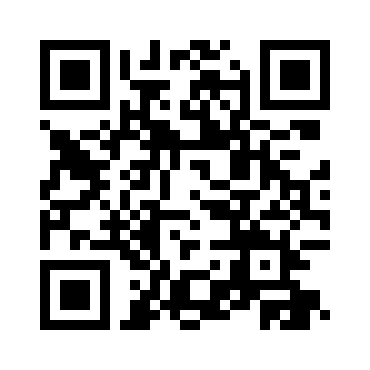

In [29]:
img

In [30]:
qr.print_ascii(invert=True);

█████████████████████████████████████
█████████████████████████████████████
████ ▄▄▄▄▄ █▀██ █▀▀▄ ▀▄███ ▄▄▄▄▄ ████
████ █   █ █ █▄▄█▄█▄▀▀█▄▀█ █   █ ████
████ █▄▄▄█ ██▄  ▄██ ▄ ▄▄ █ █▄▄▄█ ████
████▄▄▄▄▄▄▄█ ▀ █▄█ ▀ █▄▀ █▄▄▄▄▄▄▄████
████▄▀▀█▀▀▄▀ ▀▄  ▀██  ▀ ▀▄▄▀▀▄  █████
█████▄  ▀█▄ ██▄ ▄ ▄▄▄▄▄▀ ▀ █▀▀███████
█████ ▄   ▄█▀▄ ▄▀▄█▄ ██  █  ▀██▀ ████
████ ▄██▀ ▄█▀▄▄█ ██▀█▄▄▀▀▀▄█ ▄ █▀████
████▀▄ ▄▄█▄▀▄▀▄ ▀▀▀█▄  ▀ █▀ ▀▄ ▀▀████
████ ▄▄▀▀█▄ ▄▀  █▀█▄███ ▀ ▀█▀▄██▄████
████▄██▄█▄▄▄ ▀▄ ██ ▄█▄▄▄ ▄▄▄ ▀▄▄▄████
████ ▄▄▄▄▄ ██▄▄▀ █▀▀▀▄█  █▄█ ▄▄██████
████ █   █ ██▄▀ █  ██  ▄  ▄▄▄ ▀▀█████
████ █▄▄▄█ ██  ▀▄ ▄▄  ▀▄▄█  ▄  ▄▀████
████▄▄▄▄▄▄▄█▄▄▄███▄▄██████▄█▄▄▄██████
█████████████████████████████████████
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀
